<a href="https://colab.research.google.com/github/thwjd639/DuSiDataTeamGunaesigdang/blob/main/%EB%AC%B8%EC%86%8C%EC%A0%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/thwjd639/DuSiDataTeamGunaesigdang.git

Cloning into 'DuSiDataTeamGunaesigdang'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 49 (delta 16), reused 7 (delta 0), pack-reused 0
Unpacking objects: 100% (49/49), done.


In [ ]:
!git config --global user.email "thwjd639@gmail.com"
!git config --global user.name "thwjd639"

In [ ]:
%cd /content/drive/MyDrive/Colab/두더지/구내식당

/content/drive/MyDrive/Colab/두더지/구내식당


In [ ]:
!git init

Reinitialized existing Git repository in /content/drive/My Drive/Colab/두더지/구내식당/.git/


In [ ]:
!ls -ltr

total 659
-rw------- 1 root root    828 Jun  2 04:42 sample_submission.csv
-rw------- 1 root root 587512 Jun  2 04:42 train.csv
-rw------- 1 root root  22172 Jun  2 04:42 test.csv
-rw------- 1 root root  59294 Aug 24 14:30 문소정.ipynb
drwx------ 5 root root   4096 Aug 24 14:30 DuSiDataTeamGunaesigdang


In [ ]:
!ls

문소정.ipynb  sample_submission.csv  test.csv  train.csv


In [ ]:
!git add 문소정.ipynb

In [ ]:
!git commit -m "1차제출"

On branch master

Initial commit

Untracked files:
	DuSiDataTeamGunaesigdang/
	sample_submission.csv
	test.csv
	train.csv
	"\341\204\206\341\205\256\341\206\253\341\204\211\341\205\251\341\204\214\341\205\245\341\206\274.ipynb"

nothing added to commit but untracked files present


In [ ]:
!git remote set-url origin https://github.com/thwjd639/DuSiDataTeamGunaesigdang.git

In [ ]:
!git remote -v

origin	https://github.com/thwjd639/DuSiDataTeamGunaesigdang.git (fetch)
origin	https://github.com/thwjd639/DuSiDataTeamGunaesigdang.git (push)


In [ ]:
!git push --set-upstream origin main

error: src refspec main does not match any.
error: failed to push some refs to 'https://github.com/thwjd639/DuSiDataTeamGunaesigdang.git'


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 0. 데이터 불러오기

In [2]:
import pandas as pd

path = '/content/drive/MyDrive/Colab/두더지/구내식당/'

sample = pd.read_csv(path + 'sample_submission.csv', encoding = 'utf-8') # DataFrame으로 읽기
test_raw = pd.read_csv(path + 'test.csv', encoding = 'utf-8')
train_raw = pd.read_csv(path + 'train.csv', encoding = 'utf-8')

In [ ]:
sample.head()

,일자,중식계,석식계
0,2021-01-27,0,0
1,2021-01-28,0,0
2,2021-01-29,0,0
3,2021-02-01,0,0
4,2021-02-02,0,0


In [ ]:
train_raw.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [ ]:
train_raw.tail()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0
1204,2021-01-26,화,2983,69,183,551,362.0,모닝롤/야채샌드 우유/주스 계란후라이/찐계란 참치죽/흑미밥 홍합탕 애호박새우젓볶음 ...,쌀밥/귀리밥/찰현미밥 들깨미역국 교촌간장치킨 옥수수콘치즈구이 가지고추장무침 포기김치...,(New)할라피뇨멸치주먹밥 잔치국수 수제고기육전 쑥갓나물 양파초절임 깍두기,1015.0,480.0


In [ ]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [ ]:
len(train_raw)

1205

In [ ]:
train_raw.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
중식계               0
석식계               0
dtype: int64

In [ ]:
train_raw.nunique()

일자                1205
요일                   5
본사정원수               53
본사휴가자수             347
본사출장자수             194
본사시간외근무명령서승인건수     507
현본사소속재택근무자수        165
조식메뉴              1204
중식메뉴              1198
석식메뉴              1168
중식계                628
석식계                405
dtype: int64

In [ ]:
train_raw.shape

(1205, 12)

In [ ]:
test_raw.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [ ]:
test_raw.tail()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴
45,2021-04-05,월,2973,125,174,704,331.0,모닝롤/커피콩빵 우유/주스 계란후라이 누룽지탕/흑미밥 청양콩나물국 스팸구이 양상추샐...,쌀밥/흑미밥/찰현미밥 쇠고기미역국 춘천닭갈비 오지치즈후라이 가지두반장볶음 포기김치 ...,흑미밥 돈육고추장찌개 갈치구이 김치전 취나물무침 깍두기
46,2021-04-06,화,2973,76,170,636,364.0,모닝롤/모닝샌드 우유/주스 계란후라이 고구마스프/흑미밥 아욱국 참치채소볶음 양상추샐...,쌀밥/귀리밥/찰현미밥 순두부백탕 매콤소갈비찜 깻잎완자전 돌나물초장무침 포기김치 시리...,추가밥 짬뽕*생면 수제찹쌀꿔바로우 메추리알곤약장조림 단무지무침 포기김치
47,2021-04-07,수,2973,96,214,1,334.0,모닝롤/호떡맥모닝 우유/주스 계란후라이 팥죽/흑미밥 닭살해장국 우엉채조림 양상추샐러...,쌀밥/흑미밥/찰현미밥 냉이국 돈육간장불고기 비빔냉면 오이나물볶음 겉절이김치 양상추샐...,단호박카레라이스 시금치된장국 소떡소떡 파프리카해초무침 감귤쥬스 포기김치
48,2021-04-08,목,2973,105,238,509,324.0,모닝롤/크로크무슈 우유/주스 계란후라이 누룽지탕/흑미밥 감자국 두부양념조림 양상추샐...,쌀밥/옥수수밥/찰현미밥 맑은떡국 (New)로제찜닭 가자미구이*장 유채나물무침 포기김...,흑미밥 어묵매운탕 쇠고기숙주볶음 채소계란찜 쑥갓생무침 김치볶음
49,2021-04-09,금,2973,259,268,0,229.0,모닝롤/토마토샌드 우유/주스 계란후라이 채소죽/흑미밥 대구지리 애호박나물볶음 양상추...,쌀밥/흑미밥/찰현미밥 사골우거지국 해물누룽지탕 청포묵*양념간장 비름나물고추장무침 석...,흑미밥 맑은버섯국 매운사태조림 춘권*타르타르D 열무나물무침 포기김치


In [ ]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              50 non-null     object 
 1   요일              50 non-null     object 
 2   본사정원수           50 non-null     int64  
 3   본사휴가자수          50 non-null     int64  
 4   본사출장자수          50 non-null     int64  
 5   본사시간외근무명령서승인건수  50 non-null     int64  
 6   현본사소속재택근무자수     50 non-null     float64
 7   조식메뉴            50 non-null     object 
 8   중식메뉴            50 non-null     object 
 9   석식메뉴            50 non-null     object 
dtypes: float64(1), int64(4), object(5)
memory usage: 4.0+ KB


In [ ]:
test_raw.shape

(50, 10)

In [ ]:
test_raw.isnull().sum()

일자                0
요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
조식메뉴              0
중식메뉴              0
석식메뉴              0
dtype: int64

In [ ]:
test_raw.nunique()

일자                50
요일                 5
본사정원수              4
본사휴가자수            44
본사출장자수            44
본사시간외근무명령서승인건수    35
현본사소속재택근무자수       45
조식메뉴              50
중식메뉴              50
석식메뉴              50
dtype: int64

# 1. 데이터 전처리

In [3]:
# train 컬럼명 수정하기
train = train_raw.copy()
train.columns = ['date', 'dow', 'employees', 'dayoff', 'buss_trip', 'overtime', 'telecommute', 'breakfast_menu', 'lunch_menu', 'dinner_menu', 'target_lunch', 'target_dinner']
train.head()

,date,dow,employees,dayoff,buss_trip,overtime,telecommute,breakfast_menu,lunch_menu,dinner_menu,target_lunch,target_dinner
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [4]:
# test 컬럼명 수정하기

test = test_raw.copy()
test.columns =  ['date', 'dow', 'employees', 'dayoff', 'buss_trip', 'overtime', 'telecommute', 'breakfast_menu', 'lunch_menu', 'dinner_menu']
test.head()

,date,dow,employees,dayoff,buss_trip,overtime,telecommute,breakfast_menu,lunch_menu,dinner_menu
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지
2,2021-01-29,금,2983,270,249,0,294.0,모닝롤/핫케익 우유/주스 계란후라이/찐계란 오곡죽/흑미밥 매생이굴국 고구마순볶음 양...,쌀밥/흑미밥/찰현미밥 팽이장국 수제돈까스*소스 가자미조림 동초나물무침 포기김치 양상...,흑미밥 물만둣국 카레찜닭 숯불양념꼬지어묵 꼬시래기무침 포기김치
3,2021-02-01,월,2924,108,154,538,322.0,모닝롤/촉촉한치즈케익 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 두부김칫국 새우완...,쌀밥/흑미밥/찰현미밥 배추들깨국 오리대패불고기 시금치프리타타 부추고추장무침 포기김치...,흑미밥 동태탕 돈육꽈리고추장조림 당면채소무침 모자반무침 포기김치
4,2021-02-02,화,2924,62,186,455,314.0,모닝롤/토마토샌드 우유/주스 계란후라이/찐계란 채소죽/흑미밥 호박맑은국 오이생채 양...,쌀밥/팥밥/찰현미밥 부대찌개 닭살데리야끼조림 버섯탕수 세발나물무침 알타리김치/사과푸...,흑미밥 바지락살국 쇠고기청경채볶음 두부구이*볶은김치 머위된장무침 백김치


In [5]:
# date, dow 변수 날짜 자료형으로 변환
train['date'] = pd.to_datetime(train['date'])

test['date'] = pd.to_datetime(test['date'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1205 non-null   datetime64[ns]
 1   dow             1205 non-null   object        
 2   employees       1205 non-null   int64         
 3   dayoff          1205 non-null   int64         
 4   buss_trip       1205 non-null   int64         
 5   overtime        1205 non-null   int64         
 6   telecommute     1205 non-null   float64       
 7   breakfast_menu  1205 non-null   object        
 8   lunch_menu      1205 non-null   object        
 9   dinner_menu     1205 non-null   object        
 10  target_lunch    1205 non-null   float64       
 11  target_dinner   1205 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 113.1+ KB


In [6]:
# date를 년월일 분할하기
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1205 non-null   datetime64[ns]
 1   dow             1205 non-null   object        
 2   employees       1205 non-null   int64         
 3   dayoff          1205 non-null   int64         
 4   buss_trip       1205 non-null   int64         
 5   overtime        1205 non-null   int64         
 6   telecommute     1205 non-null   float64       
 7   breakfast_menu  1205 non-null   object        
 8   lunch_menu      1205 non-null   object        
 9   dinner_menu     1205 non-null   object        
 10  target_lunch    1205 non-null   float64       
 11  target_dinner   1205 non-null   float64       
 12  year            1205 non-null   int64         
 13  month           1205 non-null   int64         
 14  day             1205 non-null   int64         
dtypes: d

In [7]:
# 요일 dow는 범주형으로 만들기
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

class_le = LabelEncoder()
train['week'] = class_le.fit_transform(train['dow'].values)
test['week'] = class_le.fit_transform(test['dow'].values)

In [ ]:
train.head(2)

,date,dow,employees,dayoff,buss_trip,overtime,telecommute,breakfast_menu,lunch_menu,dinner_menu,target_lunch,target_dinner,week
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,3
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,4


In [ ]:
test.head(2)

,date,dow,employees,dayoff,buss_trip,overtime,telecommute,breakfast_menu,lunch_menu,dinner_menu,week
0,2021-01-27,수,2983,88,182,5,358.0,모닝롤/연유버터베이글 우유/주스 계란후라이/찐계란 단호박죽/흑미밥 우거지국 고기완자...,쌀밥/흑미밥/찰현미밥 대구지리 매운돈갈비찜 오꼬노미계란말이 상추무침 포기김치 양상추...,흑미밥 얼큰순두부찌개 쇠고기우엉볶음 버섯햄볶음 (New)아삭이고추무절임 포기김치,2
1,2021-01-28,목,2983,104,212,409,348.0,모닝롤/대만샌드위치 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 황태국 시래기지짐 ...,쌀밥/보리밥/찰현미밥 우렁된장찌개 오리주물럭 청양부추전 수제삼색무쌈 겉절이김치 양상...,충무김밥 우동국물 오징어무침 꽃맛살샐러드 얼갈이쌈장무침 석박지,1


## 1.1 메뉴명 

In [10]:
lunch = []
for day in range(len(train)):
    tmp = train.iloc[day, 8].split(' ')
    tmp = ' '.join(tmp).split()

    search = '('
    for menu in tmp:
        if search in menu:
            tmp.remove(menu)
    
    lunch.append(tmp)

In [12]:
lunch[0:5]

[['쌀밥/잡곡밥', '오징어찌개', '쇠불고기', '계란찜', '청포묵무침', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '김치찌개', '가자미튀김', '모둠소세지구이', '마늘쫑무침', '요구르트', '배추겉절이'],
 ['카레덮밥', '팽이장국', '치킨핑거', '쫄면야채무침', '견과류조림', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '쇠고기무국', '주꾸미볶음', '부추전', '시금치나물', '요구르트', '포기김치'],
 ['쌀밥/잡곡밥', '떡국', '돈육씨앗강정', '우엉잡채', '청경채무침', '요구르트', '포기김치']]

In [14]:
import numpy as np
np.array(train[(train.index >1064)&(train.index < 1069)][['date','lunch_menu']])

array([[Timestamp('2020-06-11 00:00:00'),
        '쌀밥/잡곡밥 (쌀,현미,흑미:국내산) 매운소고기국  굴비구이  토마토프리타타  도라지오이무침  배추겉절이 (배추국내,고추가루:중국산) '],
       [Timestamp('2020-06-12 00:00:00'),
        '돈육버섯고추장덮밥 (쌀,돈육:국내산) 팽이무국  양파링카레튀김  모듬어묵볶음  참나물생채 요구르트 포기김치 (김치:국내산) '],
       [Timestamp('2020-07-01 00:00:00'),
        '쌀밥/잡곡밥 냉모밀국수 매운돈갈비찜 메밀전병*간장 고구마순볶음 포기김치 양상추샐러드*딸기요거트 '],
       [Timestamp('2020-07-02 00:00:00'),
        '쌀밥/잡곡밥 대파육개장 홍어미나리초무침 어묵잡채 콩자반 배추겉절이 양상추샐러드*오리엔탈 ']],
      dtype=object)

In [15]:
# lunch train data에 메뉴명별 칼럼 만들기 (밥, 국, 반찬1-3)
bob=[]; gook=[]; banchan1=[]; banchan2=[]; banchan3=[]; kimchi=[]; side=[]
for i, day_menu in enumerate(lunch):
    bob_tmp = day_menu[0]; bob.append(bob_tmp)
    gook_tmp = day_menu[1]; gook.append(gook_tmp)
    banchan1_tmp = day_menu[2]; banchan1.append(banchan1_tmp)
    banchan2_tmp = day_menu[3]; banchan2.append(banchan2_tmp)
    banchan3_tmp = day_menu[4]; banchan3.append(banchan3_tmp)

    if i < 1067:
        kimchi_tmp = day_menu[-1]; kimchi.append(kimchi_tmp)
        side_tmp = day_menu[-2]; side.append(side_tmp)
    else:
        kimchi_tmp = day_menu[-2]; kimchi.append(kimchi_tmp)
        side_tmp = day_menu[-1]; side.append(side_tmp)

In [40]:
train_ln = train[['date', 'dow', 'employees', 'dayoff', 'buss_trip', 'overtime', 'telecommute', 'lunch_menu', 'target_lunch']]
train_ln['bob'] = bob
train_ln['gook'] = gook
train_ln['banchan1'] = banchan1; train_ln['banchan2'] = banchan2; train_ln['banchan3'] = banchan3
train_ln['kimchi'] = kimchi 
train_ln['side'] = side

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [41]:
train_ln.iloc[1066:1070, 7:]

,lunch_menu,target_lunch,bob,gook,banchan1,banchan2,banchan3,kimchi,side
1066,"돈육버섯고추장덮밥 (쌀,돈육:국내산) 팽이무국 양파링카레튀김 모듬어묵볶음 참나...",516.0,돈육버섯고추장덮밥,팽이무국,양파링카레튀김,모듬어묵볶음,참나물생채,포기김치,요구르트
1067,쌀밥/잡곡밥 냉모밀국수 매운돈갈비찜 메밀전병*간장 고구마순볶음 포기김치 양상추샐러드...,866.0,쌀밥/잡곡밥,냉모밀국수,매운돈갈비찜,메밀전병*간장,고구마순볶음,포기김치,양상추샐러드*딸기요거트
1068,쌀밥/잡곡밥 대파육개장 홍어미나리초무침 어묵잡채 콩자반 배추겉절이 양상추샐러드*오리엔탈,675.0,쌀밥/잡곡밥,대파육개장,홍어미나리초무침,어묵잡채,콩자반,배추겉절이,양상추샐러드*오리엔탈
1069,카레라이스 동태알탕 부추고추전*간장 쫄면야채무침 과일요거트샐러드 포기김치 요구르트,607.0,카레라이스,동태알탕,부추고추전*간장,쫄면야채무침,과일요거트샐러드,포기김치,요구르트


In [42]:
# 밥
bob_df = pd.DataFrame(train_ln['bob'].value_counts().reset_index())
bob_df

,index,bob
0,쌀밥/잡곡밥,879
1,쌀밥/흑미밥/찰현미밥,74
2,콩나물밥,23
3,카레덮밥,18
4,나물비빔밥,15
...,...,...
70,김치필라프,1
71,건강비빔밥*약고추장,1
72,버섯영양밥,1
73,봄새싹비빔밥,1


In [43]:
bob_df.describe()

,bob
count,75.000000
mean,16.066667
std,101.402241
min,1.000000
25%,1.000000
50%,1.000000
75%,5.000000
max,879.000000


In [44]:
# 국
gook_df = pd.DataFrame(train_ln['gook'].value_counts().reset_index())
gook_df

,index,gook
0,맑은국,46
1,콩나물국,44
2,된장찌개,37
3,어묵국,31
4,배추된장국,28
...,...,...
267,멸치국수,1
268,두부맑은국,1
269,감자양파국,1
270,맑은버섯육개장,1


In [45]:
gook_df.gook.describe()

count    272.000000
mean       4.430147
std        7.022545
min        1.000000
25%        1.000000
50%        1.000000
75%        5.000000
max       46.000000
Name: gook, dtype: float64

In [46]:
# 반찬 1~3 
train_ln[f'banchan1'][0:3]

0     쇠불고기
1    가자미튀김
2     치킨핑거
Name: banchan1, dtype: object

In [47]:
banchan_list = []
for i in range(3):
    tmp = train_ln[f'banchan{i+1}']
    for j in range(len(train_ln)):
        tmp2 = tmp[j]
        banchan_list.append(tmp2)

In [48]:
banchan_df = pd.DataFrame(pd.DataFrame(banchan_list).value_counts())
banchan_df.columns = ['banchan']
banchan_df.reset_index(inplace = True)
banchan_df.columns = ['index', 'banchan']

In [49]:
banchan_df

,index,banchan
0,오이무침,35
1,오징어볶음,32
2,닭갈비,30
3,버섯불고기,29
4,콩나물무침,28
...,...,...
1169,소세지구이,1
1170,소세지감자조림,1
1171,소고기잡채,1
1172,소고기숙주나물볶음,1


In [50]:
banchan_df.banchan.describe()

count    1174.000000
mean        3.079216
std         4.371070
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        35.000000
Name: banchan, dtype: float64

# 2. 시각화

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056

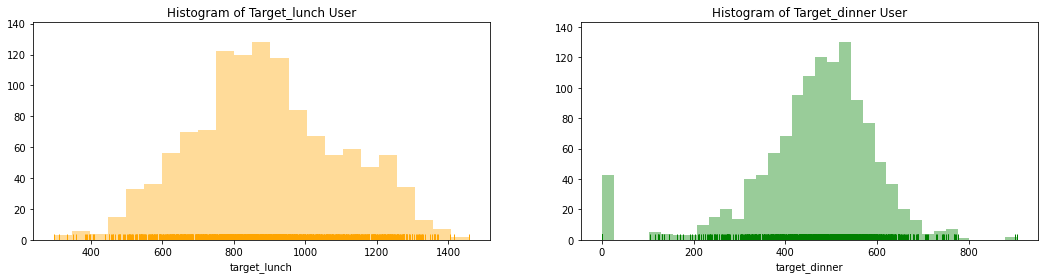

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# 이용자수
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 4))
sns.distplot(train["target_lunch"], ax = ax[0], color = 'orange', kde = False, rug = True)
sns.distplot(train["target_dinner"], ax = ax[1], color = 'green', kde = False, rug = True)
ax[0].set_title("Histogram of Target_lunch User")
ax[1].set_title("Histogram of Target_dinner User")
plt.show()

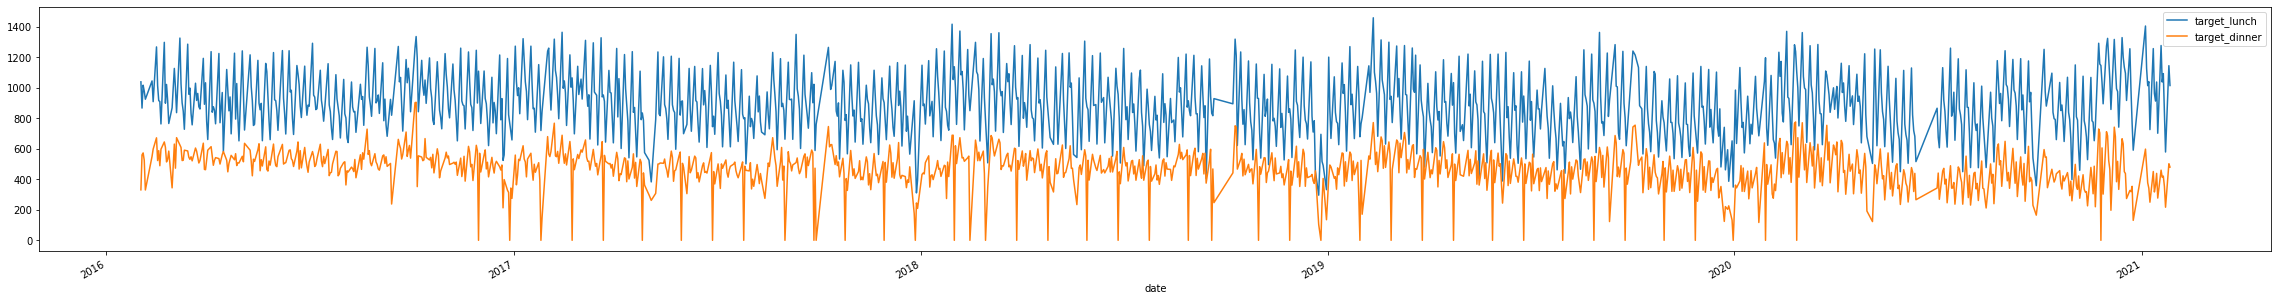

In [58]:
# 코로나
train.plot(x = 'date', y = ['target_lunch', 'target_dinner'], figsize = (40, 5))
plt.show()

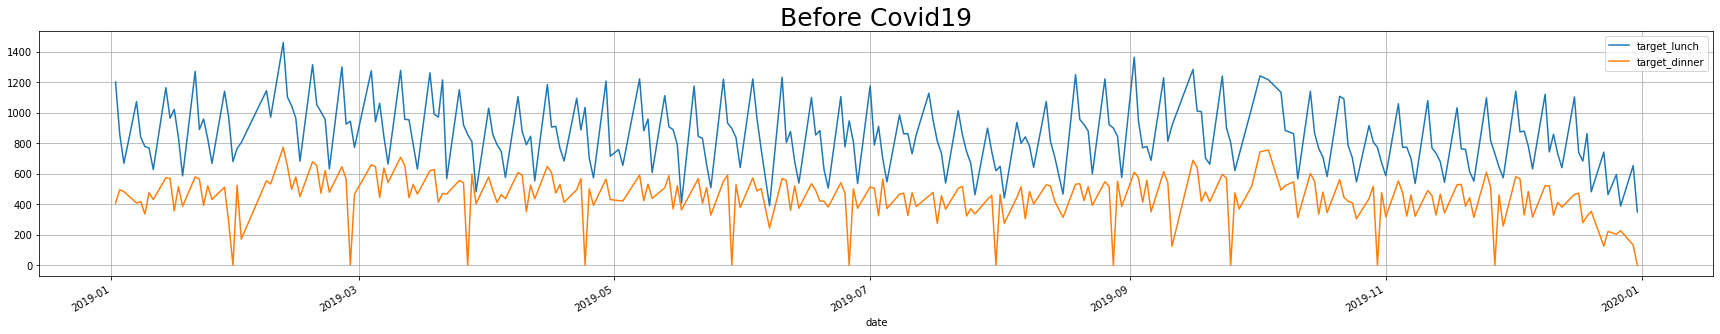

In [59]:
before_covid = train[train['date'].dt.year == 2019][['date', 'target_lunch', 'target_dinner']]
before_covid.plot(x = 'date', y = ['target_lunch', 'target_dinner'], figsize = (30, 5), grid = True)
plt.title('Before Covid19', fontsize = 25)
plt.show()

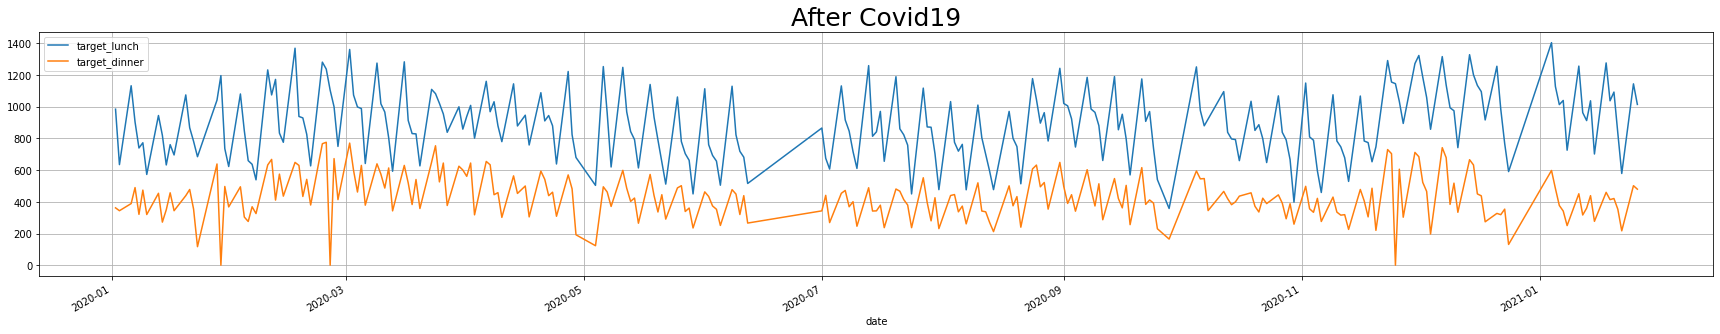

In [60]:
after_covid = train[train['date'].dt.year >= 2020][['date', 'target_lunch', 'target_dinner']]
after_covid.plot(x = 'date', y = ['target_lunch', 'target_dinner'], figsize = (30, 5), grid = True)
plt.title('After Covid19', fontsize = 25)
plt.show()

In [64]:
print('2019년 점심 평균 이용자수 :', round(before_covid.target_lunch.mean(), 2), ', 2020년 점심 평균 이용자수 :', round(after_covid.target_lunch.mean(), 2))
print('2019년 저녁 평균 이용자수 :', round(before_covid.target_dinner.mean(), 2), ', 2020년 저녁 평균 이용자수 :', round(after_covid.target_dinner.mean(), 2))

2019년 점심 평균 이용자수 : 850.51 , 2020년 점심 평균 이용자수 : 890.97
2019년 저녁 평균 이용자수 : 445.39 , 2020년 저녁 평균 이용자수 : 428.34


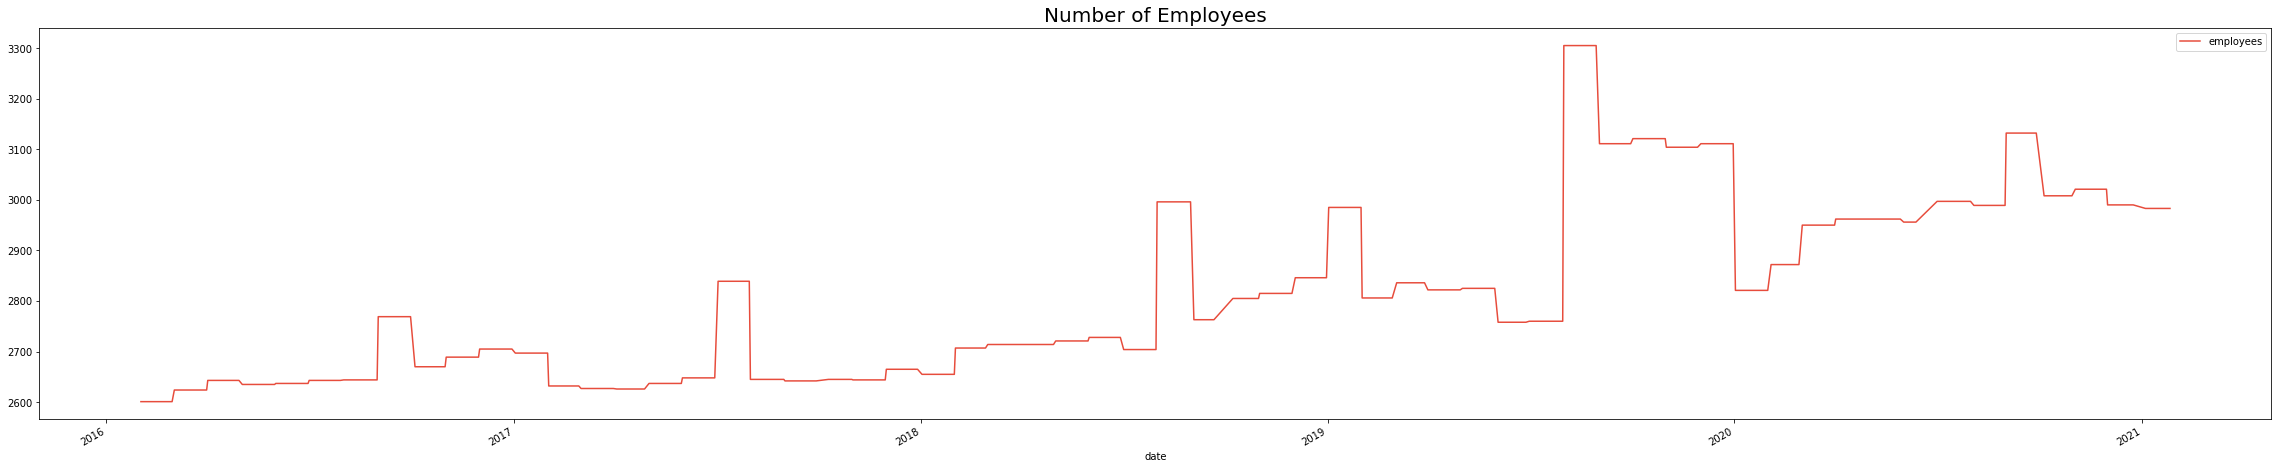

In [65]:
train.plot(x = 'date', y = 'employees', figsize = (40, 8), c = "#e74c3c")
plt.title("Number of Employees", fontsize = 20)
plt.show()

In [67]:
train[train.target_dinner == 0][['date',  'dayoff', 'buss_trip', 'overtime', 'telecommute', 'dow', 'dinner_menu', 'target_dinner']]

,date,dayoff,buss_trip,overtime,telecommute,dow,dinner_menu,target_dinner
204,2016-11-30,68,207,0,0.0,수,*,0.0
224,2016-12-28,166,225,0,0.0,수,*,0.0
244,2017-01-25,79,203,0,0.0,수,*,0.0
262,2017-02-22,75,252,0,0.0,수,*,0.0
281,2017-03-22,53,235,0,0.0,수,*,0.0
306,2017-04-26,45,304,0,0.0,수,*,0.0
327,2017-05-31,43,265,0,0.0,수,자기계발의날,0.0
346,2017-06-28,58,259,0,0.0,수,*자기계발의날*,0.0
366,2017-07-26,254,246,0,0.0,수,가정의날,0.0
392,2017-09-01,177,303,45,0.0,금,*,0.0


# 3. 상관관계

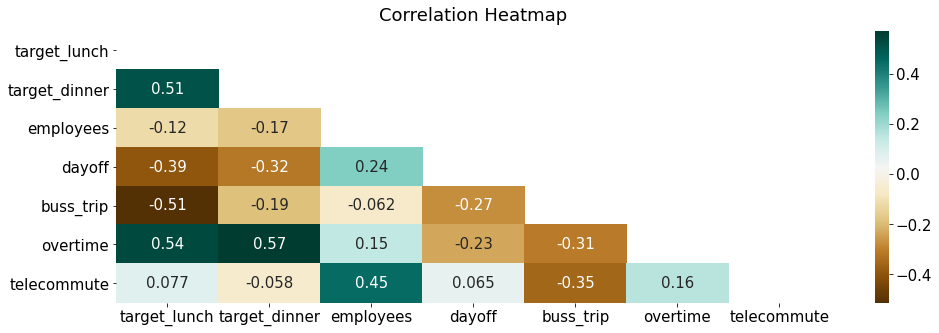

In [68]:
df = train[['target_lunch', 'target_dinner', 'employees', 'dayoff', 'buss_trip', 'overtime', 'telecommute']]
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(figsize=(16, 5))
sns.heatmap(df.corr(), 
            annot=True, 
            cmap="BrBG", 
            mask = mask)
ax.set_title('Correlation Heatmap', pad = 10)
plt.show()

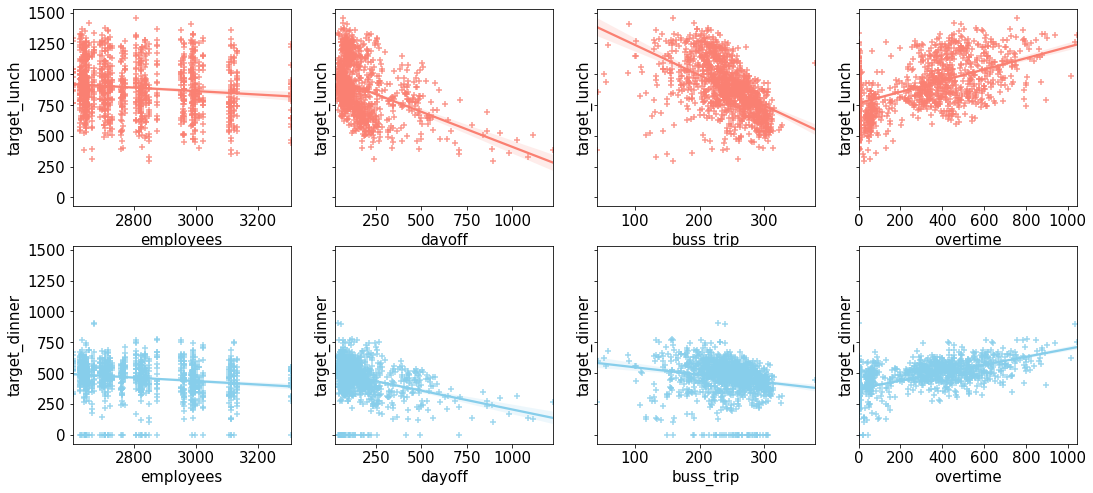

In [69]:
fig, ax = plt.subplots(figsize = (18, 8), ncols = 4, nrows = 2, sharey=True)
plt.rcParams['font.size'] = 12
sns.color_palette("Paired")
train_features = ['employees', 'dayoff', 'buss_trip', 'overtime', 'employees', 'dayoff', 'buss_trip', 'overtime']
for i, feature in enumerate(train_features):
    row = int(i/4)
    col = i%4 
    if i < 4:
        sns.regplot(x=feature, y = 'target_lunch', data = train, ax = ax[row][col], color = 'salmon', marker = '+')
    else: 
        sns.regplot(x=feature, y = 'target_dinner', data = train, ax = ax[row][col], color = 'skyblue', marker = '+')

In [72]:
tmp = train[['date', 'week', 'employees', 'dayoff', 'buss_trip', 'overtime', 'telecommute', 'target_lunch', 'target_dinner']]
tmp['month'] = tmp['date'].dt.strftime("%m")

tmp_ln = tmp.groupby(['week', 'month'])['target_lunch'].mean().reset_index().pivot('week', 'month', 'target_lunch')
tmp_dn = tmp.groupby(['week', 'month'])['target_dinner'].mean().reset_index().pivot('week', 'month', 'target_dinner')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


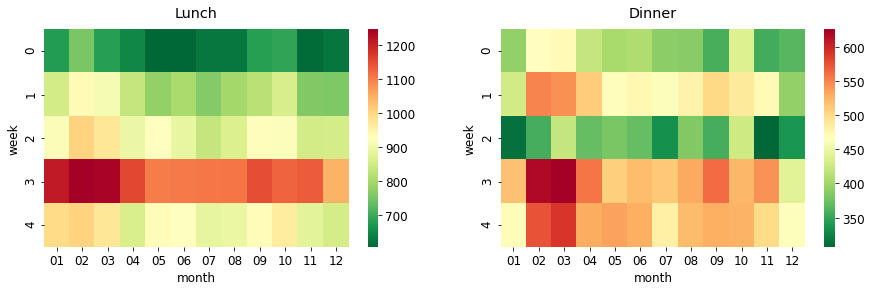

In [73]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))

sns.heatmap(tmp_ln, cmap='RdYlGn_r', ax=ax[0])
ax[0].set_title('Lunch', pad = 12)
sns.heatmap(tmp_dn, cmap='RdYlGn_r', ax=ax[1])
ax[1].set_title('Dinner', pad = 12)

plt.show()

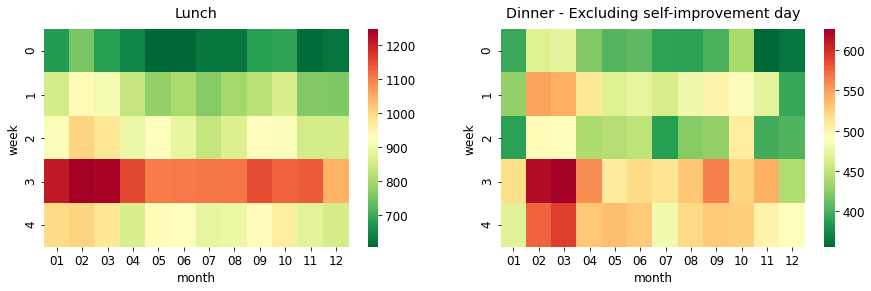

In [77]:
# 자기개발의 날 삭제 
idx = train[train.target_dinner == 0].index
tmp = train.drop(idx)
tmp['month'] = tmp['date'].dt.strftime("%m")
tmp_dn2 = tmp.groupby(['week', 'month'])['target_dinner'].mean().reset_index().pivot('week', 'month', 'target_dinner')

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))

sns.heatmap(tmp_ln, cmap='RdYlGn_r', ax=ax[0])
ax[0].set_title('Lunch', pad = 12)
sns.heatmap(tmp_dn2, cmap='RdYlGn_r', ax=ax[1])
ax[1].set_title('Dinner - Excluding self-improvement day', pad = 12)

plt.show()

In [79]:
before = train['date'].dt.year < 2020
after = train['date'].dt.year >= 2020

train[before]['telecommute'].value_counts()  # 코로나19 전 재택근무자수 

0.0    956
Name: telecommute, dtype: int64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


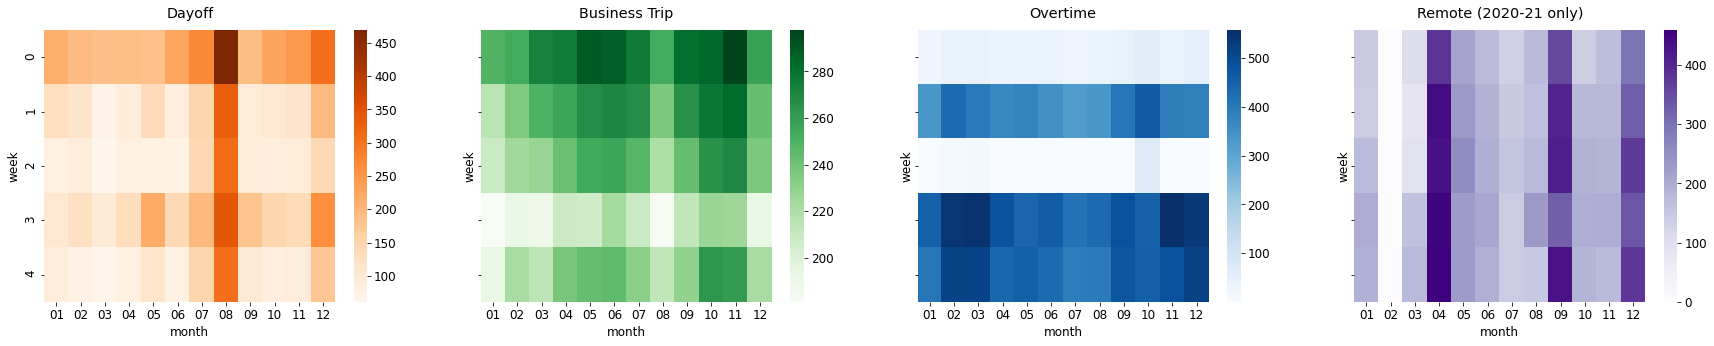

In [82]:
before = train['date'].dt.year < 2020
after = train['date'].dt.year >= 2020

def heatmap_viz(df): 
    df['month'] = df['date'].dt.strftime("%m")
    before = df['date'].dt.year < 2020
    after = df['date'].dt.year >= 2020

    tmp_dayoff = df.groupby(['week', 'month'])['dayoff'].mean().reset_index().pivot('week', 'month', 'dayoff')
    tmp_bustrip = df.groupby(['week', 'month'])['buss_trip'].mean().reset_index().pivot('week', 'month', 'buss_trip')
    tmp_ovtime = df.groupby(['week', 'month'])['overtime'].mean().reset_index().pivot('week', 'month', 'overtime')
    tmp_remote_after = df[after].groupby(['week', 'month'])['telecommute'].mean().reset_index().pivot('week', 'month', 'telecommute')

    fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (30, 5), sharey = True)

    sns.heatmap(tmp_dayoff, cmap='Oranges', ax=ax[0])   #1 
    ax[0].set_title('Dayoff', pad = 12)
    sns.heatmap(tmp_bustrip, cmap='Greens', ax=ax[1])   #2 
    ax[1].set_title('Business Trip', pad = 12)
    sns.heatmap(tmp_ovtime, cmap='Blues', ax=ax[2])   #3
    ax[2].set_title('Overtime', pad = 12)
    sns.heatmap(tmp_remote_after, cmap='Purples', ax=ax[3])   # 4
    ax[3].set_title('Remote (2020-21 only)', pad = 12)
   
    plt.show()

df = train[['date', 'week', 'dayoff', 'buss_trip', 'overtime', 'telecommute']]
heatmap_viz(df)

In [83]:
df = train[['date', 'week', 'employees', 'dayoff', 'buss_trip', 'overtime', 'telecommute', 'target_lunch', 'target_dinner']]
df['in_office'] = df['employees'] - (df['dayoff'] + df['buss_trip'] + df['telecommute'])
df['month'] = df['date'].dt.strftime("%m")
df.head(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,week,employees,dayoff,buss_trip,overtime,telecommute,target_lunch,target_dinner,in_office,month
0,2016-02-01,3,2601,50,150,238,0.0,1039.0,331.0,2401.0,02
1,2016-02-02,4,2601,50,173,319,0.0,867.0,560.0,2378.0,02
2,2016-02-03,2,2601,56,180,111,0.0,1017.0,573.0,2365.0,02


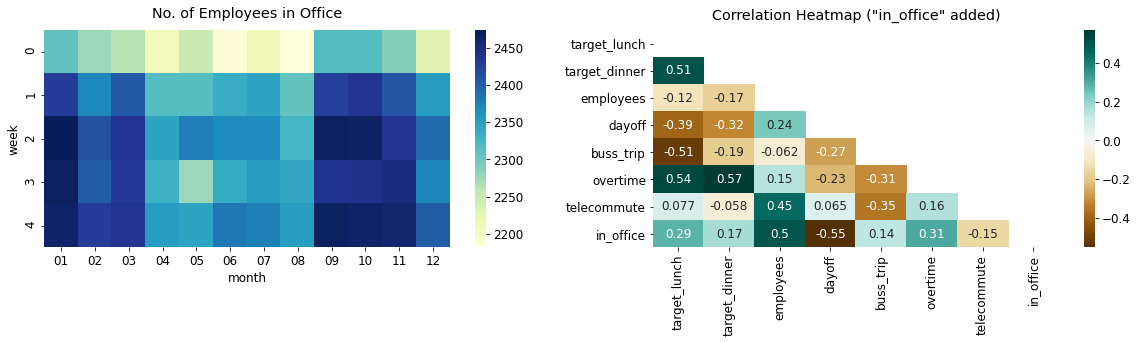

In [84]:
tmp = df.groupby(['week', 'month'])['in_office'].mean().reset_index().pivot('week', 'month', 'in_office')

# Heatmap
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 4))

sns.heatmap(tmp, cmap='YlGnBu', ax = ax[0])    # 1 
ax[0].set_title('No. of Employees in Office', pad = 12)

df_corr = df[['target_lunch', 'target_dinner', 'employees', 'dayoff', 'buss_trip', 'overtime', 'telecommute', 'in_office']]   # 2
mask = np.triu(np.ones_like(df_corr.corr(), dtype=np.bool))
sns.heatmap(df_corr.corr(), 
            annot=True, 
            cmap="BrBG", 
            mask = mask, 
            ax =ax[1])
ax[1].set_title('Correlation Heatmap ("in_office" added)', pad = 10)
plt.show()


# 4. Word Embedding

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMRegressor

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [86]:
# HYPER PARAMETERS

class CFG:
    emb_dim = 200

args = CFG

In [87]:
df_all = pd.concat([train, test])

In [88]:
# Basic text preprocessing

def split_process(x, q):
    x_ = []
    x = x.split(' ')
    for i in x:
        if '(' in i and ':' in i and ')' in i:
            continue
        if '/' in i:
            x_.extend(i.split('/'))
        else:
            x_.append(i)
    x_ = list(set(x_))
    x_.remove('')
    return x_

In [93]:
# Train or load w2v model

TRAIN_W2V = True
try:
    model = Word2Vec.load('food_embedding.model')
    print("Model loaded")
except:
    if TRAIN_W2V:
        print("Training w2v")
        model = Word2Vec(sentences=lunch, vector_size=args.emb_dim, window=7, min_count=0, workers=4, sg=0, epochs=5000)
        model.save('food_embedding.model')
    else:
        print("Model loading failed. Do not train.")

Training w2v


TypeError: ignored

In [ ]:
# w2v demo
model.wv.most_similar('된장찌개')

In [ ]:
def process_date(df):
    df['일자'] = pd.to_datetime(df['일자'], format="%Y-%m-%d")
    df['year'] = df['일자'].dt.year
    df['month'] = df['일자'].dt.month
    df['day'] = df['일자'].dt.day
    df = df.drop('일자', axis=1)
    return df

def get_food_embedding(x):
    x_ = []
    x = x.split(' ')
    for i in x:
        if '(' in i and ':' in i and ')' in i:
            continue
        if '/' in i:
            x_.extend(i.split('/'))
        else:
            x_.append(i)
    x_ = list(set(x_))
    x_.remove('')
    vec_ = np.zeros(args.emb_dim)
    for i in x_:
        vec = model.wv.get_vector(i)
        vec_ += vec
    vec_ /= len(x_)
    return vec_

In [ ]:
# General preprocessing
df_train = process_date(train)
day_encoder = LabelEncoder()
df_train['week'] = day_encoder.fit_transform(df_train['week'])

In [ ]:
# Get embedding
df_train['breakfast_menu_embedding'] = df_train['breakfast_menu_embedding'].apply(lambda x: get_food_embedding(x))
df_train['lunch_menu_embedding'] = df_train['lunch_menu_embedding'].apply(lambda x: get_food_embedding(x))
df_train['dinner_menu_embedding'] = df_train['dinner_menu_embedding'].apply(lambda x: get_food_embedding(x))

In [ ]:
y_lunch = df_train['중식계']
y_dinner = df_train['석식계']
df_train.drop(['조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계'], axis=1, inplace=True)

In [ ]:
X_common = df_train.iloc[:, :9]

In [ ]:
# emb_arr_lunch = np.array(df_train.iloc[:, 9].to_numpy().tolist()) + np.array(df_train.iloc[:, 10].to_numpy().tolist()) # Ver 1
# emb_arr_dinner = np.array(df_train.iloc[:, 9].to_numpy().tolist()) + np.array(df_train.iloc[:, 11].to_numpy().tolist()) # Ver 1
emb_arr_lunch = np.array(df_train.iloc[:, 10].to_numpy().tolist()) # Ver 2
emb_arr_dinner = np.array(df_train.iloc[:, 11].to_numpy().tolist()) # Ver 2

X_train_lunch = np.concatenate((X_common.to_numpy(), emb_arr_lunch), axis=1)
X_train_dinner = np.concatenate((X_common.to_numpy(), emb_arr_dinner), axis=1)

In [ ]:
X_train_lunch, X_test_lunch, y_train_lunch, y_test_lunch = train_test_split(X_train_lunch, y_lunch, test_size=0.1, random_state=42)
X_train_dinner, X_test_dinner, y_train_dinner, y_test_dinner = train_test_split(X_train_dinner, y_dinner, test_size=0.1, random_state=42)

# 6. 모델링

In [ ]:
# Simple LGBM Regressor w/o tuning
model_lunch = LGBMRegressor()
model_lunch.fit(X_train_lunch, y_train_lunch)

model_dinner = LGBMRegressor()
model_dinner.fit(X_train_dinner, y_train_dinner)

# Validate
pred_lunch = model_lunch.predict(X_test_lunch)
pred_dinner = model_dinner.predict(X_test_dinner)

print("lunch mae: ", mean_absolute_error(y_test_lunch, pred_lunch))
print("dinner mae: ", mean_absolute_error(y_test_dinner, pred_dinner))

# 7. Inference

In [ ]:
df_test = pd.read_csv('./data/test.csv')

# Apply general preprocessing
df_test= process_date(df_test)
df_test['요일'] = day_encoder.transform(df_test['요일'])
df_test['조식메뉴_embedding'] = df_test['조식메뉴'].apply(lambda x: get_food_embedding(x))
df_test['중식메뉴_embedding'] = df_test['중식메뉴'].apply(lambda x: get_food_embedding(x))
df_test['석식메뉴_embedding'] = df_test['석식메뉴'].apply(lambda x: get_food_embedding(x))
df_test.drop(['조식메뉴', '중식메뉴', '석식메뉴'], axis=1, inplace=True)
X_test_common = df_test.iloc[:, :9]

In [ ]:
emb_arr_lunch = np.array(df_train.iloc[:, 10].to_numpy().tolist()) # Ver 2
emb_arr_dinner = np.array(df_train.iloc[:, 11].to_numpy().tolist()) # Ver 2

In [ ]:
# Get embedding
test_emb_arr_lunch = np.array(df_test.iloc[:, 10].to_numpy().tolist()) # Ver 2
test_emb_arr_dinner = np.array(df_test.iloc[:, 11].to_numpy().tolist()) # Ver 2
# Concat
test_lunch = np.concatenate((X_test_common.to_numpy(), test_emb_arr_lunch), axis=1)
test_dinner = np.concatenate((X_test_common.to_numpy(), test_emb_arr_dinner), axis=1)

In [ ]:
# Inference

test_pred_lunch = model_lunch.predict(test_lunch)
test_pred_dinner = model_dinner.predict(test_dinner)

submission_df = pd.read_csv('./data/sample_submission.csv')
submission_df['중식계'] = test_pred_lunch
submission_df['석식계'] = test_pred_dinner

In [ ]:
# Save

submission_df.to_csv('sub_2.csv', index=False)